<a href="https://colab.research.google.com/github/Sachin20010517/Bank-Mangement-ML-model/blob/main/bank_management_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Import Libraries*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.inspection import permutation_importance


# *Data Loading*

In [ ]:
-+df = pd.read_csv('banking.csv')
df.shape

(41188, 21)

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [ ]:
print("Number of rows and columns of Training Dataset :", df.shape)

Number of rows and columns of Training Dataset : (41188, 21)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

# *Statistical Summaries:*

In [ ]:
#Check statistical values for fields with numerical datatype

df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp_var_rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons_price_idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons_conf_idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr_employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [ ]:
#Verify statistical values (using numpy) for fields that have data types other than numeric.
df.describe(exclude=np.number).T

,count,unique,top,freq
job,41188,12,admin.,10422
marital,41188,4,married,24928
education,41188,8,university.degree,12168
default,41188,3,no,32588
housing,41188,3,yes,21576
loan,41188,3,no,33950
contact,41188,2,cellular,26144
month,41188,10,may,13769
day_of_week,41188,5,thu,8623
poutcome,41188,3,nonexistent,35563


# * Data Preprocessing *

## Data Cleaning

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


## *Removing outliers*

In [ ]:
# Remove outliers using Z-score

# Identify numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns

# Calculate Z-scores for each numerical column
z_scores = np.abs(stats.zscore(df[numerical_columns]))

# Identify indices of outliers where Z-score is greater than 3
outlier_indices = np.where(z_scores > 3)

# Get unique row indices of outliers
unique_outlier_indices = np.unique(outlier_indices[0])

# Drop outliers from DataFrame
df_clean = df.drop(unique_outlier_indices)

print("Original DataFrame shape:", df.shape)
print("Cleaned DataFrame shape:", df_clean.shape)

Original DataFrame shape: (41188, 21)
Cleaned DataFrame shape: (37314, 21)


In [ ]:
#Check for Duplicate Values
if (len(df[df.duplicated()])>0):
    print("There are Duplicate values present")
else:
    print("There is no duplicate value present")

There are Duplicate values present


## *Handling Missing Values:*

In [ ]:
# Convert String 'NaN' to np.nan
def convert_nan(df_train):
    df_train.replace('NaN', float(np.nan), regex=True, inplace=True)

convert_nan(df_clean)

In [ ]:
# Check null values
df_clean.isnull().sum().sort_values(ascending=False)

,0
age,0
campaign,0
nr_employed,0
euribor3m,0
cons_conf_idx,0
cons_price_idx,0
emp_var_rate,0
poutcome,0
previous,0
pdays,0


## *Visualization of Columns with Null Values:*

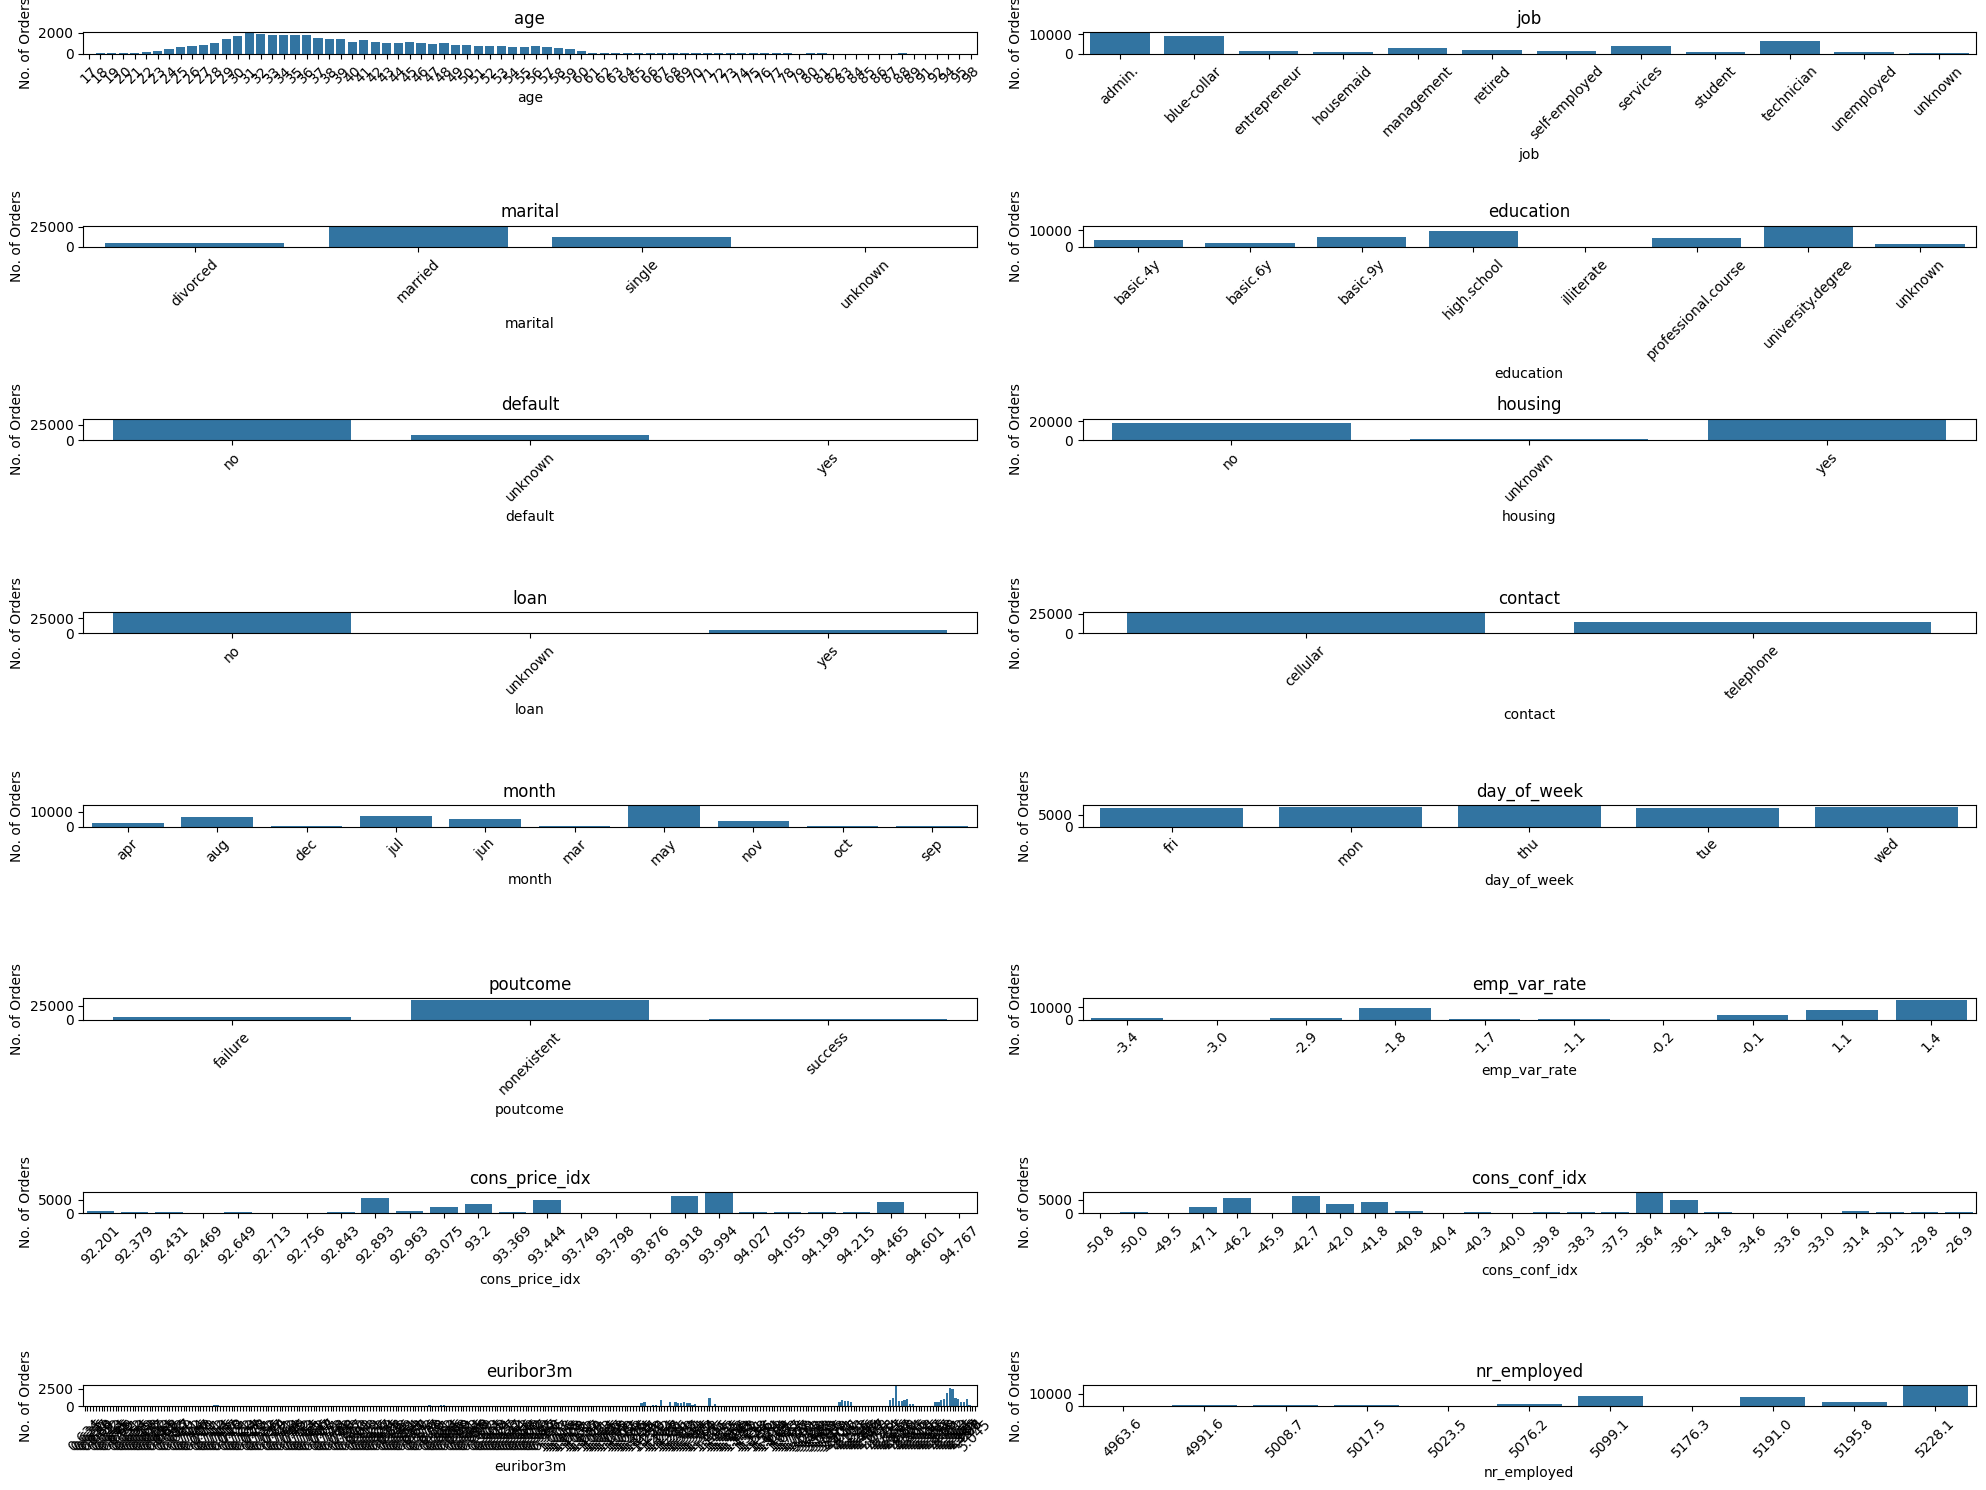

In [ ]:
#Let's explore columns that have null values
cols = ['age','job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','emp_var_rate','cons_price_idx','cons_conf_idx','euribor3m','nr_employed']
num_plots = len(cols)
num_rows = (num_plots // 2) + (num_plots % 2)

fig, axes = plt.subplots(num_rows, 2, figsize=(20,15))

for i, column_name in enumerate(cols):
    row = i // 2
    col = i % 2

    ax = axes[row, col]
    sns.countplot(data=df, x=column_name, order=df[column_name].value_counts().sort_index().index, ax=ax)

    ax.set_xlabel(column_name)
    ax.set_ylabel('No. of Orders')
    ax.set_title(column_name)
    ax.tick_params(axis='x', rotation=45)

if num_plots % 2 != 0:
    fig.delaxes(axes[-1, -1])

plt.tight_layout()
plt.show()

## *Q-Q Plots and Histograms:*

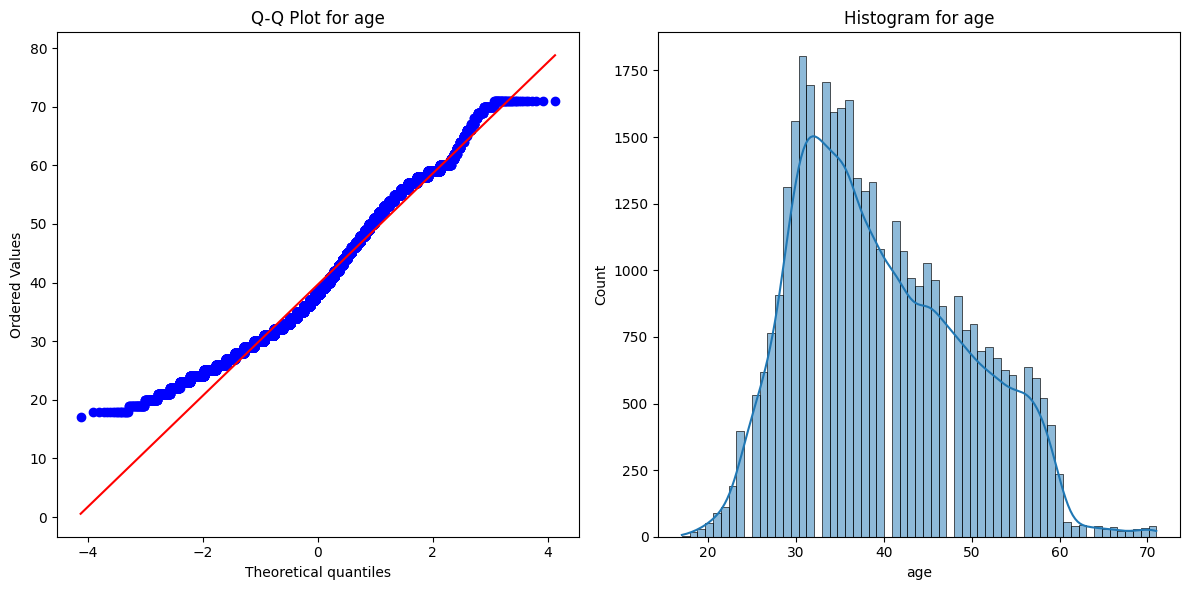

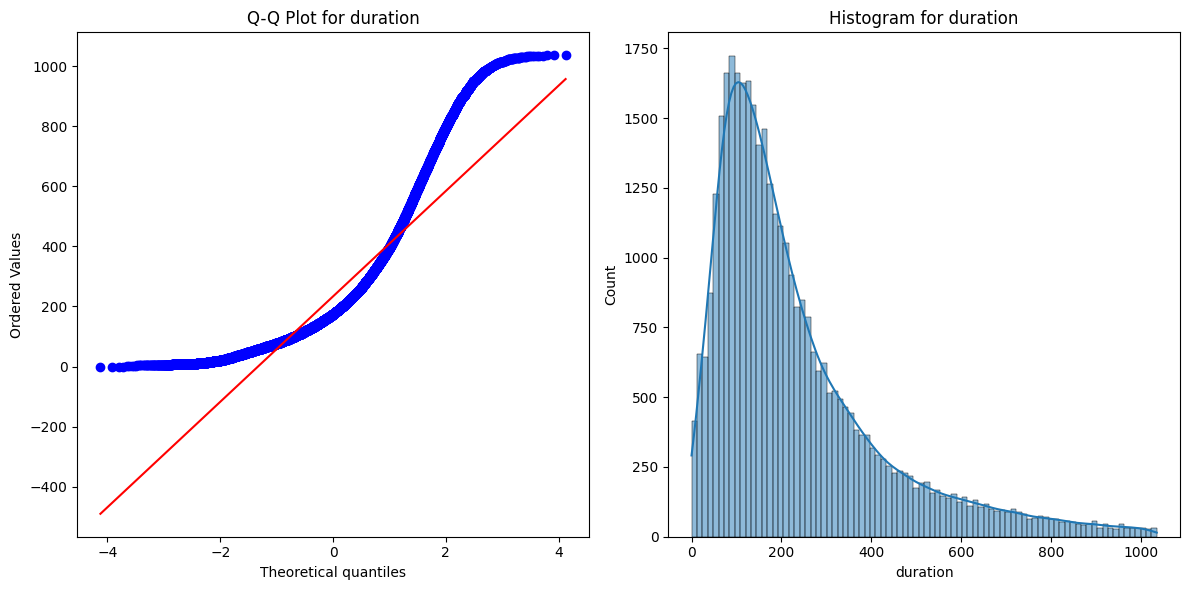

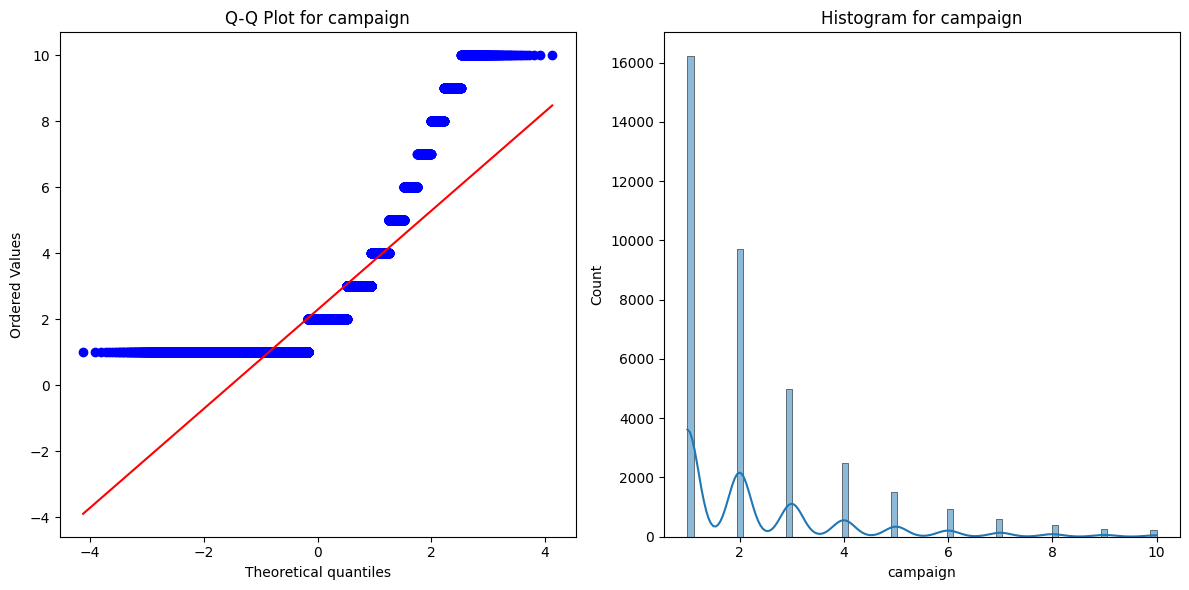

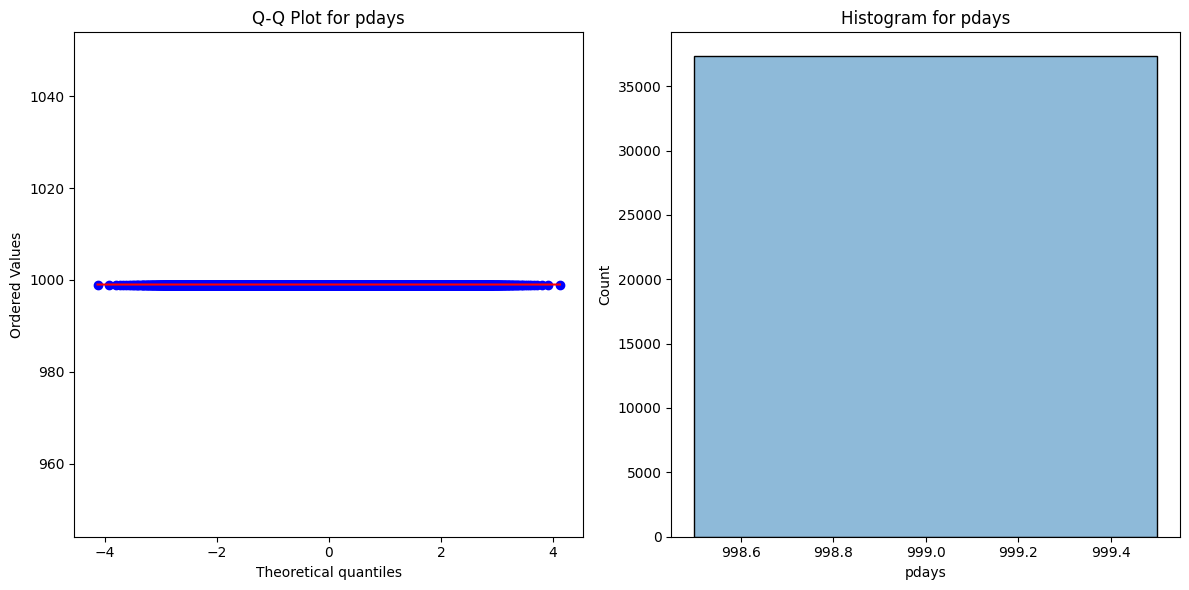

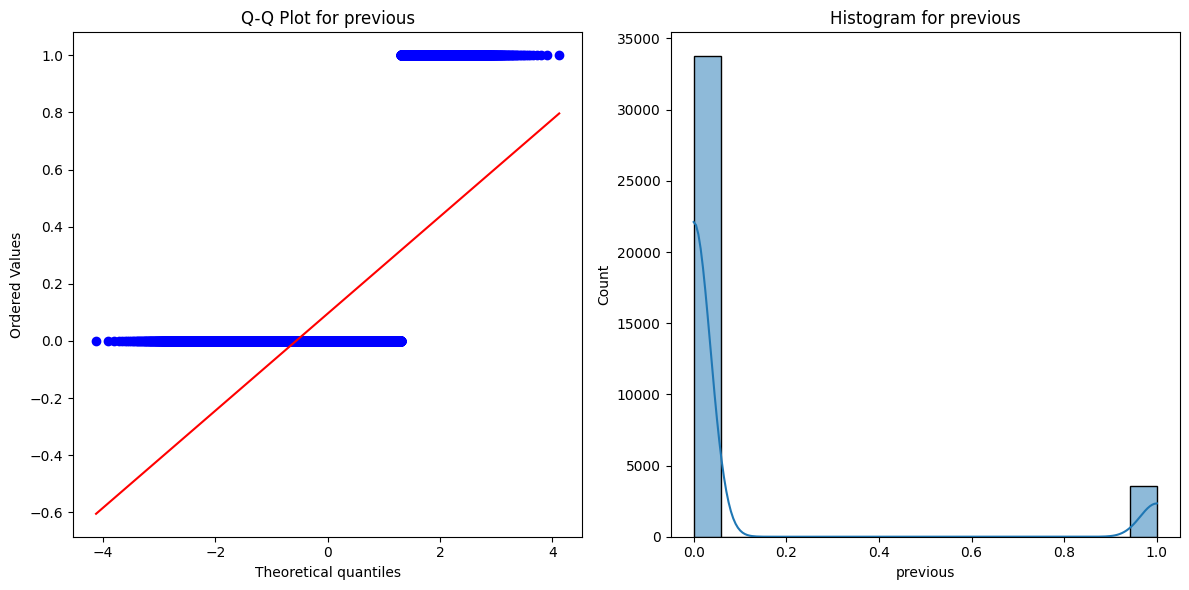

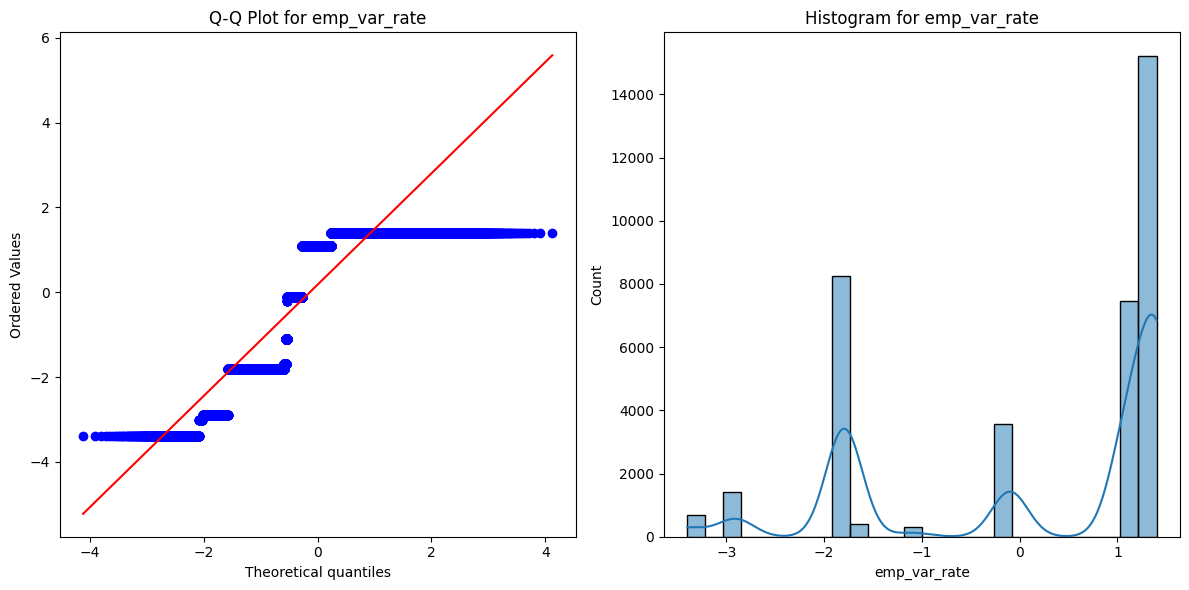

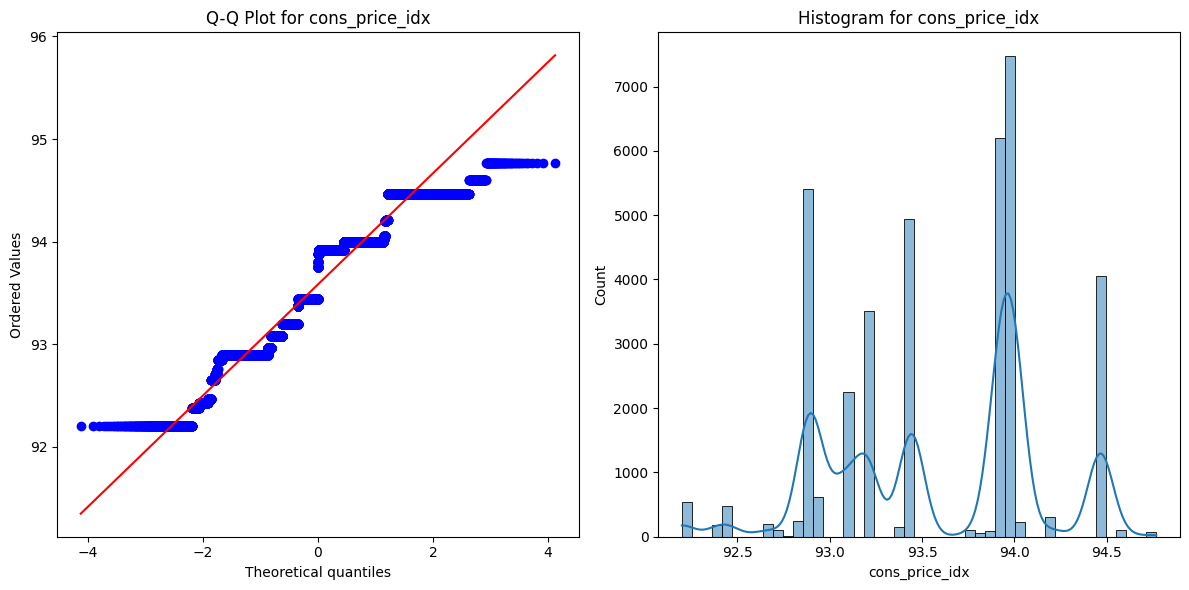

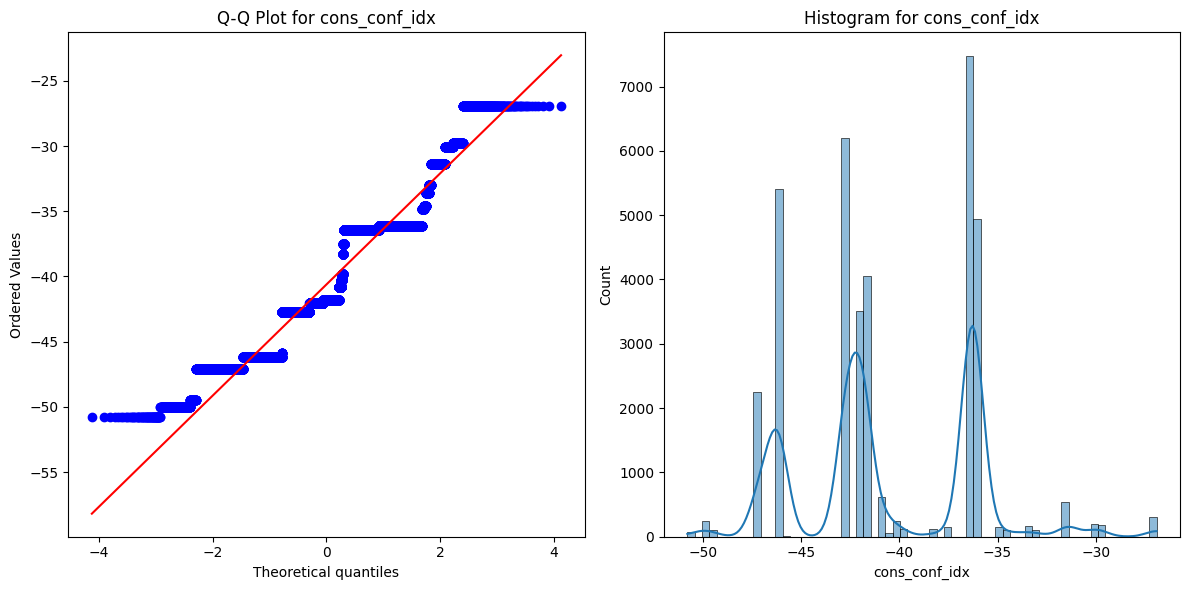

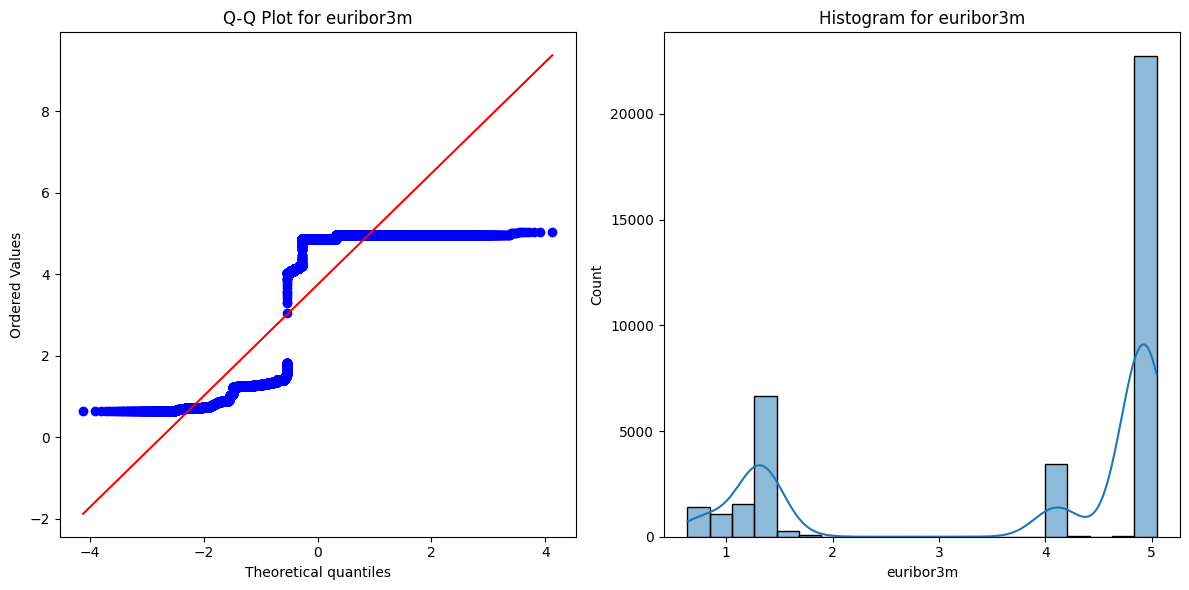

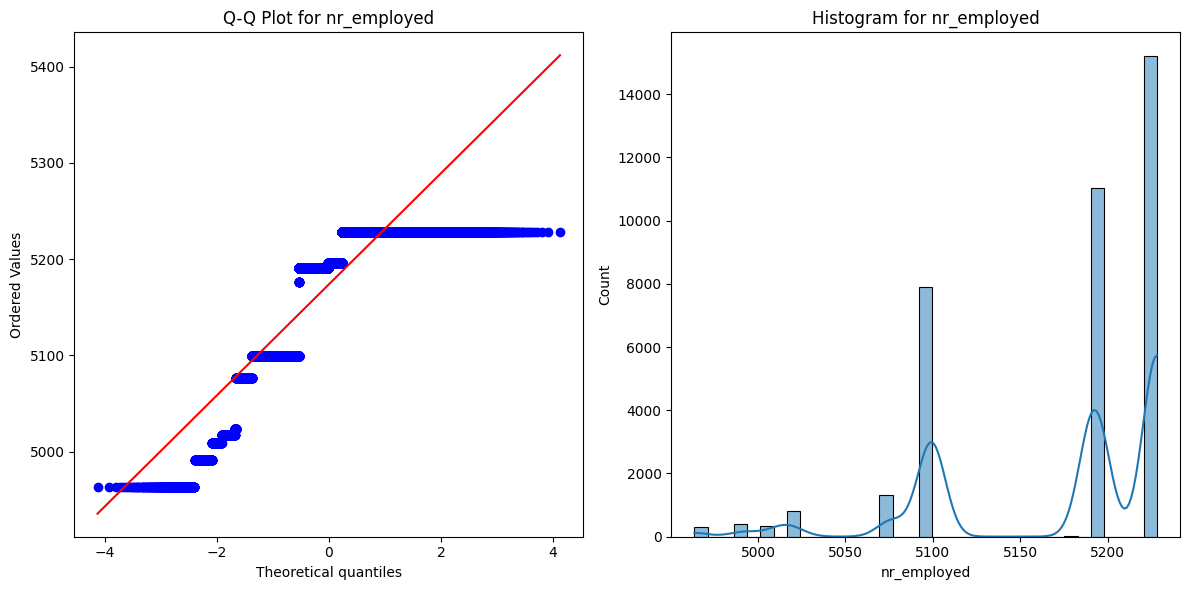

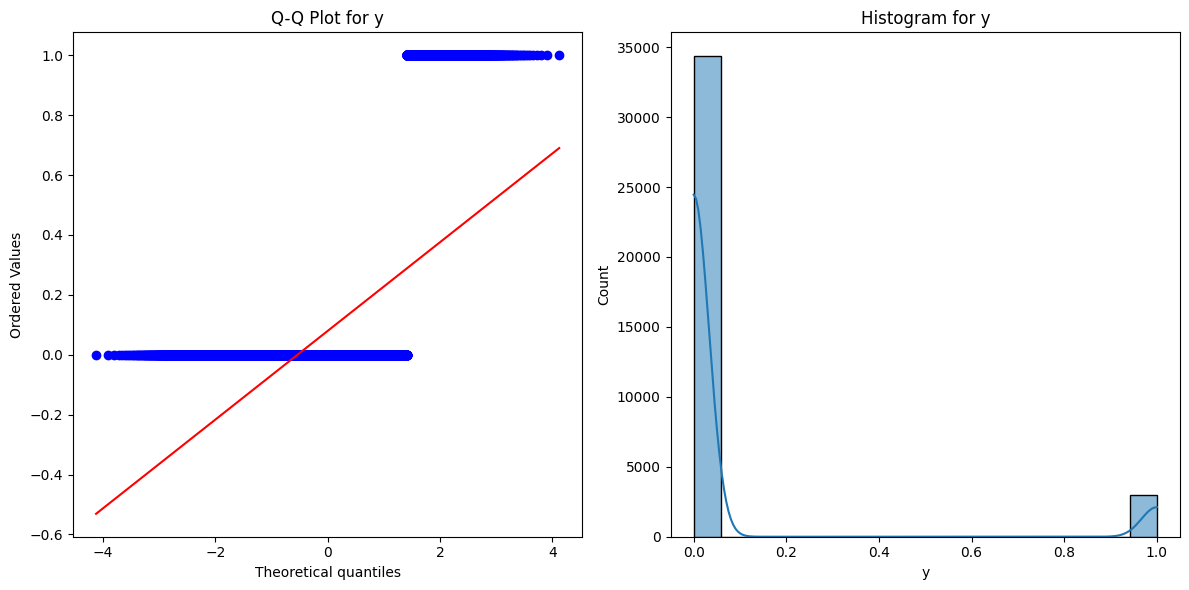

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Produce Q-Q plots and histograms for numerical columns
#Q-Q plots and histograms help in checking the distribution of the features.


for column in numerical_columns:
    plt.figure(figsize=(12, 6))

    # Q-Q plot
    plt.subplot(1, 2, 1)
    stats.probplot(df_clean[column], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for {column}')

    # Histogram
    plt.subplot(1, 2, 2)
    sns.histplot(df_clean[column], kde=True)
    plt.title(f'Histogram for {column}')

    plt.tight_layout()
    plt.show()


## *Encode Categorical Variables:*

In [ ]:
# Encode categorical variables using One-Hot Encoding
categorical_columns = df_clean.select_dtypes(include=[object]).columns
df_encoded = pd.get_dummies(df_clean, columns=categorical_columns, drop_first=True)


## *Standardize Numerical Features:*

In [ ]:
# Standardize the numerical features
scaler = StandardScaler()
df_clean_scaled = scaler.fit_transform(df_encoded)

# Verify the scaling effect
df_scaled = pd.DataFrame(df_clean_scaled, columns=df_encoded.columns)

#Standardization ensures that all features contribute equally to the analysis, improving model performance.


## *Discretize Features:*

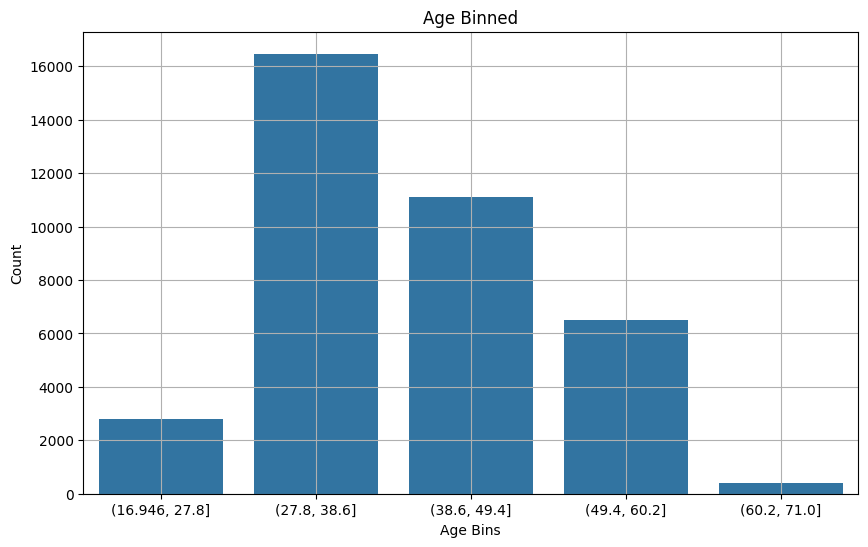

In [ ]:
# Discretize the 'age' feature into bins
df_clean['age_binned'] = pd.cut(df_clean['age'], bins=5)

# Visualize the discretized feature
plt.figure(figsize=(10, 6))
sns.countplot(x='age_binned', data=df_clean)
plt.title('Age Binned')
plt.xlabel('Age Bins')
plt.ylabel('Count')
plt.grid(True)
plt.show()


In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


## ***PCA Analysis:***

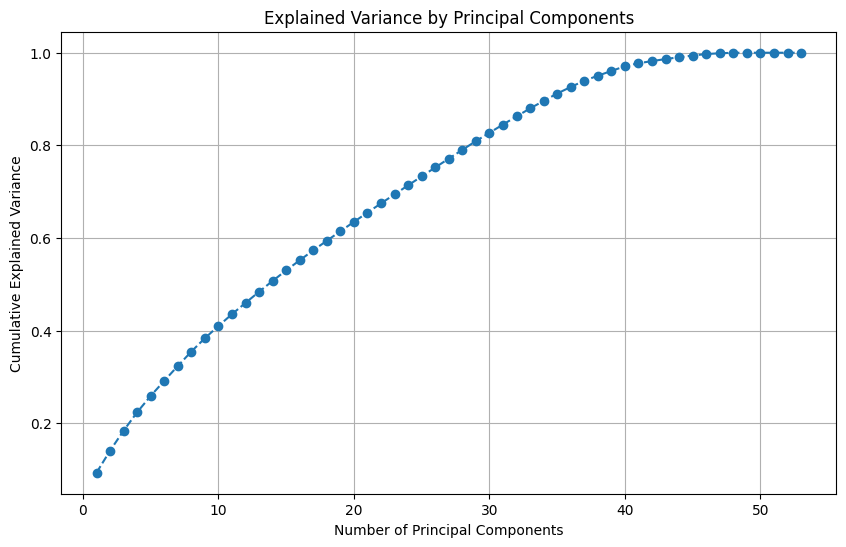

In [ ]:
# Apply PCA
pca = PCA()
pca.fit(df_clean_scaled)

# Calculate the explained variance
explained_variance = pca.explained_variance_ratio_

# Plot the explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


In [ ]:
# Select the number of components (e.g., 95% variance)
n_components = np.argmax(np.cumsum(explained_variance) >= 0.95) + 1

# Transform the data using the selected number of components
pca = PCA(n_components=n_components)
df_pca = pca.fit_transform(df_clean_scaled)

print("Shape of the original data:", df_clean_scaled.shape)
print("Shape of the data after PCA:", df_pca.shape)


Shape of the original data: (37314, 53)
Shape of the data after PCA: (37314, 38)


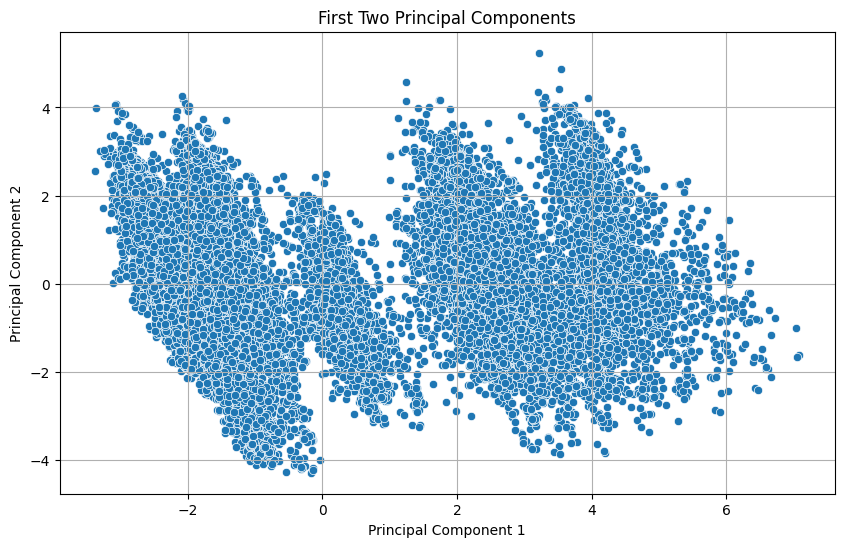

In [ ]:
# Create a DataFrame with the principal components
df_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(n_components)])

# Plot the first two principal components
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=df_pca)
plt.title('First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


In [ ]:
# Get the loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Create a DataFrame for the loadings
df_loadings = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(n_components)], index=df_encoded.columns)

# Display the loadings
print(df_loadings)


                                        PC1           PC2           PC3  \
age                           -1.326395e-01  2.278616e-01  6.068800e-01   
duration                       5.474410e-02  1.077700e-02 -2.691007e-02   
campaign                      -1.372350e-01 -2.172472e-02 -4.015424e-02   
pdays                          2.988560e-20 -1.747041e-16  3.119021e-17   
previous                       5.754909e-01  1.808489e-01  5.237214e-02   
emp_var_rate                  -9.399342e-01 -1.136757e-01 -3.126281e-02   
cons_price_idx                -8.180958e-01  1.408080e-01 -2.538710e-01   
cons_conf_idx                 -3.295539e-01 -2.207533e-01  3.056176e-01   
euribor3m                     -9.314339e-01 -1.356120e-01  1.230283e-02   
nr_employed                   -8.783009e-01 -1.616280e-01  1.054645e-02   
y                              2.886019e-01 -1.025377e-01  1.785929e-02   
job_blue-collar               -8.776234e-02  5.741118e-01 -6.696927e-02   
job_entrepreneur         

# ***Train test split***

In [ ]:
# Prepare data for modeling
X = df_encoded.drop(columns=['y'])  # Assuming 'y' is the target variable
y = df_encoded['y']

In [ ]:
# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(29851, 52)
(29851,)
(7463, 52)
(7463,)


# ***Cross-Validation and Hyperparameter Tuning***

In [ ]:
# Support Vector Machine (SVM)
svm_params = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}
svm_grid = GridSearchCV(SVC(), svm_params, cv=5, scoring='accuracy')
svm_grid.fit(X_train, y_train)
best_svm = svm_grid.best_estimator_
print("Best SVM Parameters:", svm_grid.best_params_)

Best SVM Parameters: {'C': 1, 'kernel': 'linear'}


In [ ]:
# Logistic Regression (LR)
lr_params = {'C': [0.01, 0.1, 1, 10, 100]}
lr_grid = GridSearchCV(LogisticRegression(max_iter=1000), lr_params, cv=5, scoring='accuracy')
lr_grid.fit(X_train, y_train)
best_lr = lr_grid.best_estimator_
print("Best Logistic Regression Parameters:", lr_grid.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best Logistic Regression Parameters: {'C': 0.01}


# ***Model Building***

In [ ]:
best_svm.fit(X_train, y_train)
y_pred_svm = best_svm.predict(X_test)

best_lr.fit(X_train, y_train)
y_pred_lr = best_lr.predict(X_test)

# ***Model Evaluation***

In [ ]:
print("SVM Model")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

print("\nLogistic Regression Model")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

SVM Model
Accuracy: 0.9197373710304168
Confusion Matrix:
 [[6760   83]
 [ 516  104]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      6843
           1       0.56      0.17      0.26       620

    accuracy                           0.92      7463
   macro avg       0.74      0.58      0.61      7463
weighted avg       0.90      0.92      0.90      7463


Logistic Regression Model
Accuracy: 0.9216132922417258
Confusion Matrix:
 [[6700  143]
 [ 442  178]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      6843
           1       0.55      0.29      0.38       620

    accuracy                           0.92      7463
   macro avg       0.75      0.63      0.67      7463
weighted avg       0.91      0.92      0.91      7463



# ***Feature Importance***

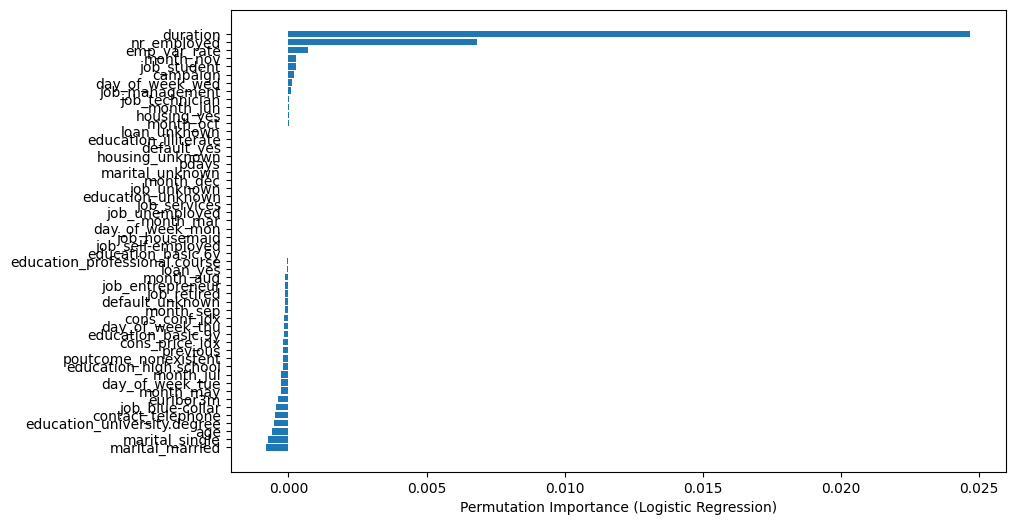

In [ ]:
# For Logistic Regression
lr_importance = permutation_importance(best_lr, X_test, y_test, n_repeats=30, random_state=42)
lr_sorted_idx = lr_importance.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.barh(X.columns[lr_sorted_idx], lr_importance.importances_mean[lr_sorted_idx])
plt.xlabel("Permutation Importance (Logistic Regression)")
plt.show()

# ***Residual Analysis***

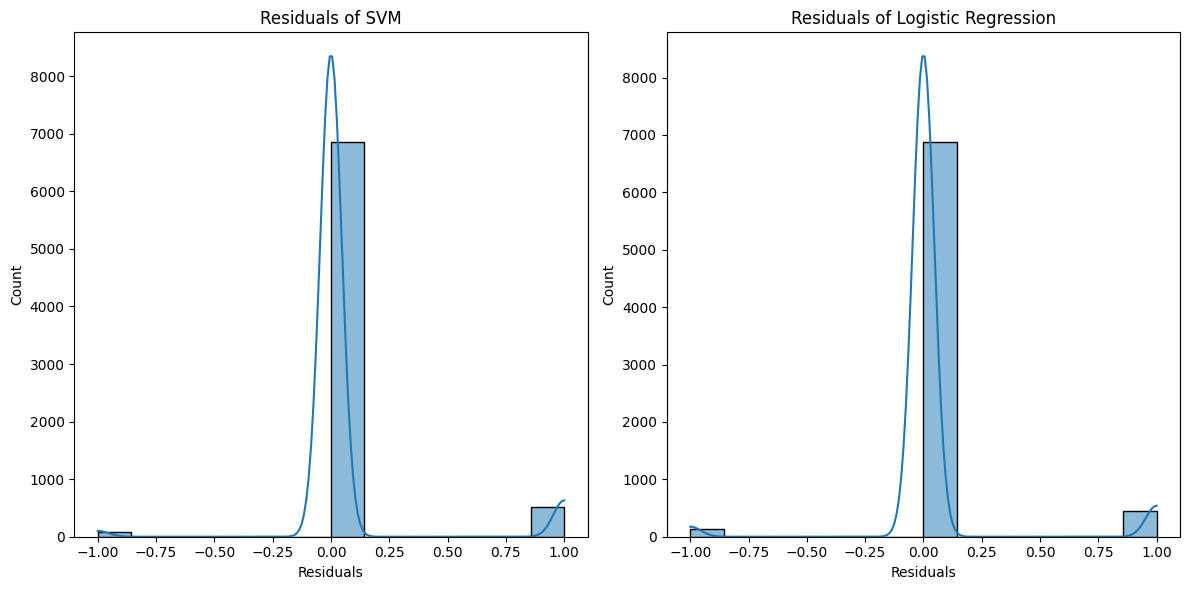

In [ ]:
# Residual Analysis
residuals_svm = y_test - y_pred_svm
residuals_lr = y_test - y_pred_lr

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(residuals_svm, kde=True)
plt.title('Residuals of SVM')
plt.xlabel('Residuals')

plt.subplot(1, 2, 2)
sns.histplot(residuals_lr, kde=True)
plt.title('Residuals of Logistic Regression')
plt.xlabel('Residuals')

plt.tight_layout()
plt.show()

# ***Final Model Training and Saving***

In [ ]:
final_model = best_lr.fit(X, y)

# Save the model for future use
import joblib
joblib.dump(final_model, 'final_model_logistic_regression.pkl')

['final_model_logistic_regression.pkl']

# ***Load the model (for demonstration)***

In [ ]:
# Load the model (for demonstration)
loaded_model = joblib.load('final_model_logistic_regression.pkl')

# ***Prediction using the loaded model***

In [ ]:
# # @title Default title text
# # sample_data = X_test.iloc[:5, :]  # Just taking first 5 samples from test set for example
# # predictions = loaded_model.predict(sample_data)
# # print("Sample Predictions:", predictions)
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# import joblib

# # Final Model Training and Saving
# final_model = best_lr.fit(X, y)

# # Save the model for future use
# joblib.dump(final_model, 'final_model_logistic_regression.pkl')

# # Load the model (for demonstration)
# loaded_model = joblib.load('final_model_logistic_regression.pkl')

# # Prediction using the loaded model
# sample_data = X_test.iloc[:5, :]  # Just taking first 5 samples from test set for example
# predictions = loaded_model.predict(sample_data)
# actual_values = y_test.iloc[:5].values

# # Create a DataFrame to compare actual and predicted values
# comparison_df = pd.DataFrame({
#     'Actual': actual_values,
#     'Predicted': predictions
# })

# print("Sample Predictions:\n", comparison_df)

# # Visualize the comparison
# plt.figure(figsize=(10, 6))
# sns.barplot(data=comparison_df.melt(), x='variable', y='value', hue='variable', palette='viridis')
# plt.title('Comparison of Actual and Predicted Values')
# plt.xlabel('Sample Index')
# plt.ylabel('Value')
# plt.legend(loc='upper right')
# plt.grid(True)
# plt.show()

# # For a more detailed comparison, use the entire test set
# predictions_full = loaded_model.predict(X_test)
# comparison_df_full = pd.DataFrame({
#     'Actual': y_test,
#     'Predicted': predictions_full
# })

# # Plot the comparison for the entire test set
# plt.figure(figsize=(14, 8))
# sns.scatterplot(data=comparison_df_full, x=range(len(comparison_df_full)), y='Actual', label='Actual', color='blue')
# sns.scatterplot(data=comparison_df_full, x=range(len(comparison_df_full)), y='Predicted', label='Predicted', color='red')
# plt.title('Comparison of Actual and Predicted Values (Full Test Set)')
# plt.xlabel('Sample Index')
# plt.ylabel('Value')
# plt.legend(loc='upper right')
# plt.grid(True)
# plt.show()


Sample Predictions:
    Sample Index  Actual  Predicted
0         33333       0          0
1         13555       0          0
2          1848       0          0
3         15413       0          0
4         31869       0          0


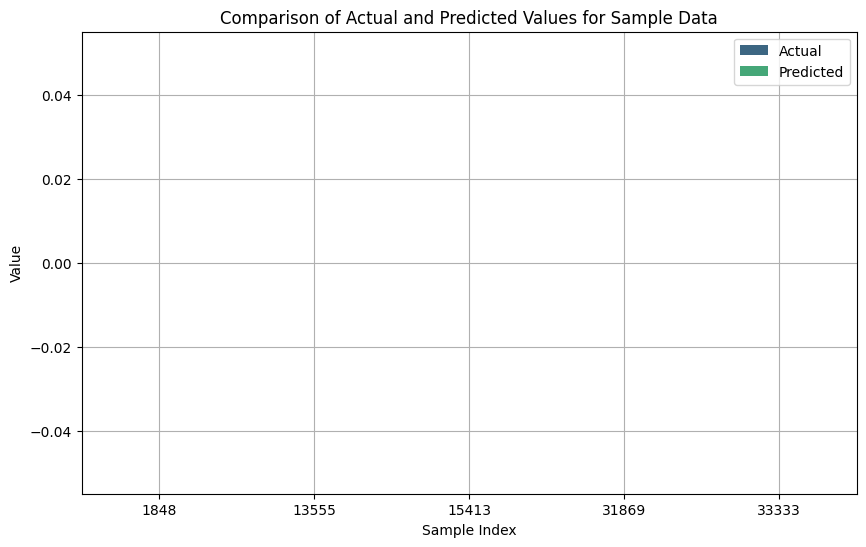

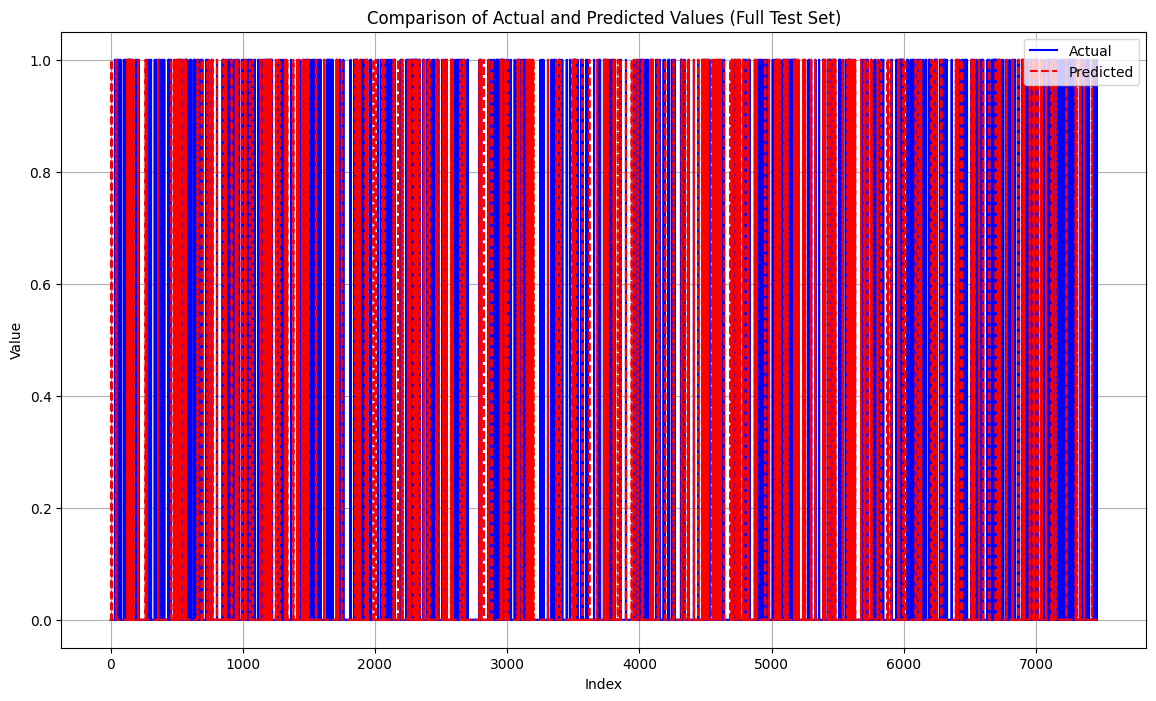

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

# Final Model Training and Saving
final_model = best_lr.fit(X, y)

# Save the model for future use
joblib.dump(final_model, 'final_model_logistic_regression.pkl')

# Load the model (for demonstration)
loaded_model = joblib.load('final_model_logistic_regression.pkl')

# Prediction using the loaded model
sample_data = X_test.iloc[:5, :]  # Just taking first 5 samples from test set for example
predictions = loaded_model.predict(sample_data)
actual_values = y_test.iloc[:5].values

# Create a DataFrame to compare actual and predicted values
comparison_df = pd.DataFrame({
    'Sample Index': sample_data.index,
    'Actual': actual_values,
    'Predicted': predictions
})

print("Sample Predictions:\n", comparison_df)

# Visualize the comparison for the sample data
plt.figure(figsize=(10, 6))
sns.barplot(data=comparison_df.melt(id_vars=['Sample Index']), x='Sample Index', y='value', hue='variable', palette='viridis')
plt.title('Comparison of Actual and Predicted Values for Sample Data')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# For a more detailed comparison, use the entire test set
predictions_full = loaded_model.predict(X_test)
comparison_df_full = pd.DataFrame({
    'Index': range(len(y_test)),
    'Actual': y_test,
    'Predicted': predictions_full
})

# Plot the comparison for the entire test set
plt.figure(figsize=(14, 8))
plt.plot(comparison_df_full['Index'], comparison_df_full['Actual'], label='Actual', color='blue')
plt.plot(comparison_df_full['Index'], comparison_df_full['Predicted'], label='Predicted', color='red', linestyle='dashed')
plt.title('Comparison of Actual and Predicted Values (Full Test Set)')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()
